In [110]:
import os
os.getcwd()

'C:\\Users\\p\\Downloads\\jar'

In [111]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
# visualizing data%matplotlib inline
import seaborn as sns

In [112]:
#Walmart Sales Analysis:
#You have been given a data set to analyse and answer the following questions: Please
#note: You have to use Python to answer the questions.

In [113]:
# loading excel dataset in da dataframe for data analysis
da = pd.read_excel("Walmart_Sales.xlsx")


In [114]:
da.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
5,699-14-3026,B,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,3/25/2019,18:30:00,Ewallet,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,2/25/2019,14:36:00,Ewallet,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,2/24/2019,11:38:00,Ewallet,8.0
8,665-32-9167,B,Yangon,Member,Female,Health and beauty,36.26,2,1/10/2019,17:15:00,Credit card,7.2
9,692-92-5582,A,Mandalay,Member,Female,Food and beverages,54.84,3,2/20/2019,13:27:00,Credit card,5.9


In [115]:
da.shape

(1000, 12)

In [116]:
#checking info for data cleaning if needed
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [117]:
pd.isnull(da)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [118]:
#there is no null value present in the dataset
pd.isnull(da).sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [119]:
#A. Analyze the performance of sales and revenue at the city and branch level ( 5 marks)

In [120]:
# Aggregate the data to calculate sales and revenue at the city and branch level
city_sales = da.groupby('City')['Unit price'].sum()
branch_sales = da.groupby('Branch')['Unit price'].sum()

In [121]:
city_revenue = da.groupby('City')['Quantity'].sum() * da.groupby('City')['Unit price'].mean()
branch_revenue = da.groupby('Branch')['Quantity'].sum() * da.groupby('Branch')['Unit price'].mean()

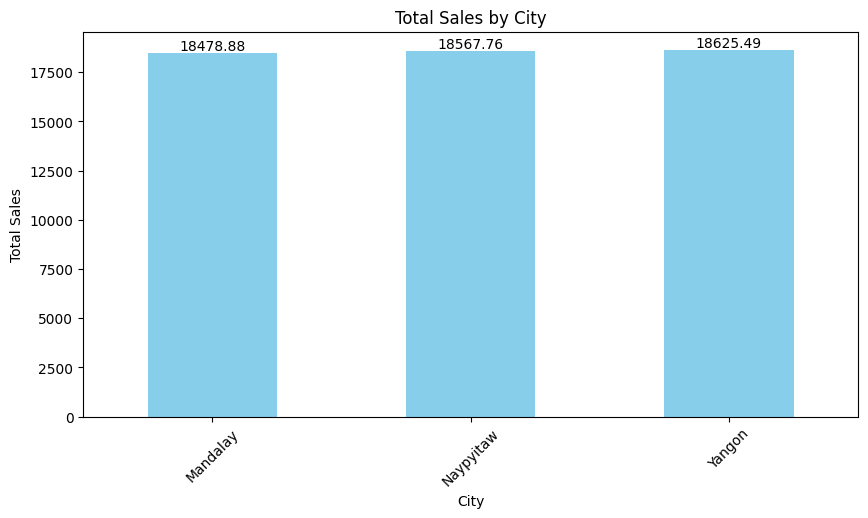

In [122]:
# Visualize the results
# Sales comparison at city level
plt.figure(figsize=(10, 5))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Add numerical values on top of bars
for index, value in enumerate(city_sales):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
    
plt.show()

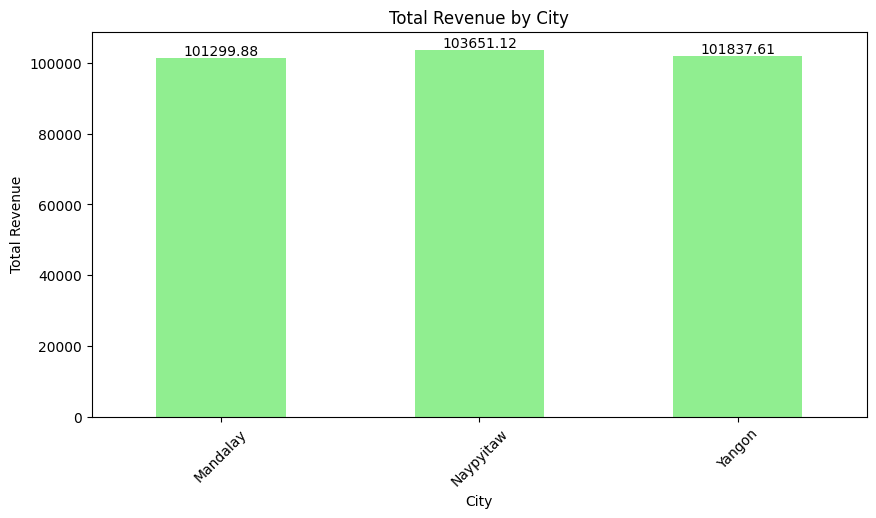

In [123]:
# Revenue comparison at city level
plt.figure(figsize=(10, 5))
city_revenue.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Add numerical values on top of bars
for index, value in enumerate(city_revenue):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
    
plt.show()

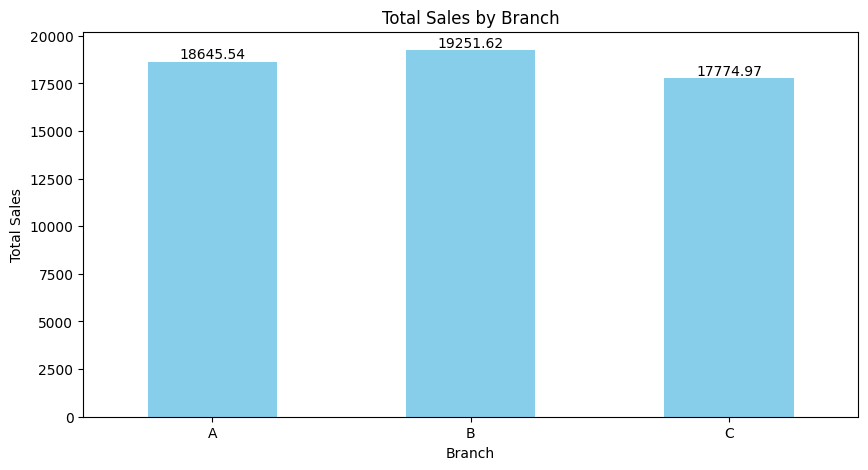

In [124]:
# Sales comparison at branch level
plt.figure(figsize=(10, 5))
branch_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Add numerical values on top of bars
for index, value in enumerate(branch_sales):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
    
plt.show()

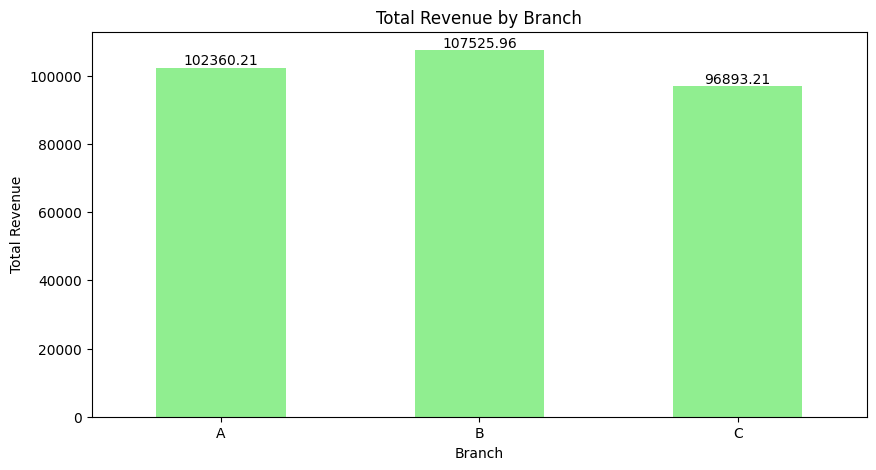

In [125]:
# Revenue comparison at branch level
plt.figure(figsize=(10, 5))
branch_revenue.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)

# Add numerical values on top of bars
for index, value in enumerate(branch_revenue):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()

In [126]:
#B. What is the average price of an item sold at each branch of the city 

In [127]:
# Group data by 'Branch' and 'City', calculate average price
average_price_per_branch_city = da.groupby(['Branch', 'City'])['Unit price'].mean()


In [128]:
# Display the average price of an item sold at each branch of the city
print("Average price of an item sold at each branch of the city:")
print(result_df)

Average price of an item sold at each branch of the city:
                  Average Price  Count
Branch City                           
A      Mandalay       53.353866    119
       Naypyitaw      54.123182    110
       Yangon         55.639298    114
B      Mandalay       56.133305    118
       Naypyitaw      57.785688    109
       Yangon         56.011062    113
C      Mandalay       57.958316     95
       Naypyitaw      57.941009    109
       Yangon         52.684602    113


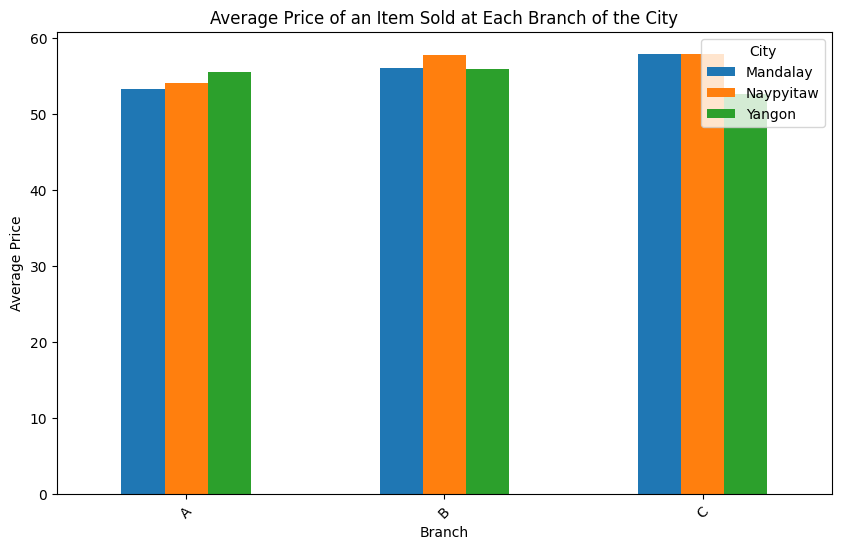

In [129]:
# Additional analysis or visualization can be done here
# For example, you can visualize the average prices using a bar chart
average_price_per_branch_city.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Average Price of an Item Sold at Each Branch of the City')
plt.xlabel('Branch')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

In [130]:
#C. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

In [131]:
# Data Preprocessing
da['Date'] = pd.to_datetime(da['Date'])
da['Month'] = da['Date'].dt.month
da['Year'] = da['Date'].dt.year


In [132]:
#Grouping and Aggregation
monthly_sales_revenue = da.groupby(['Year', 'Month', 'Product line', 'Gender', 'Payment'])[['Unit price', 'Quantity']].sum().reset_index()
monthly_sales_revenue['Revenue'] = monthly_sales_revenue['Unit price'] * monthly_sales_revenue['Quantity']


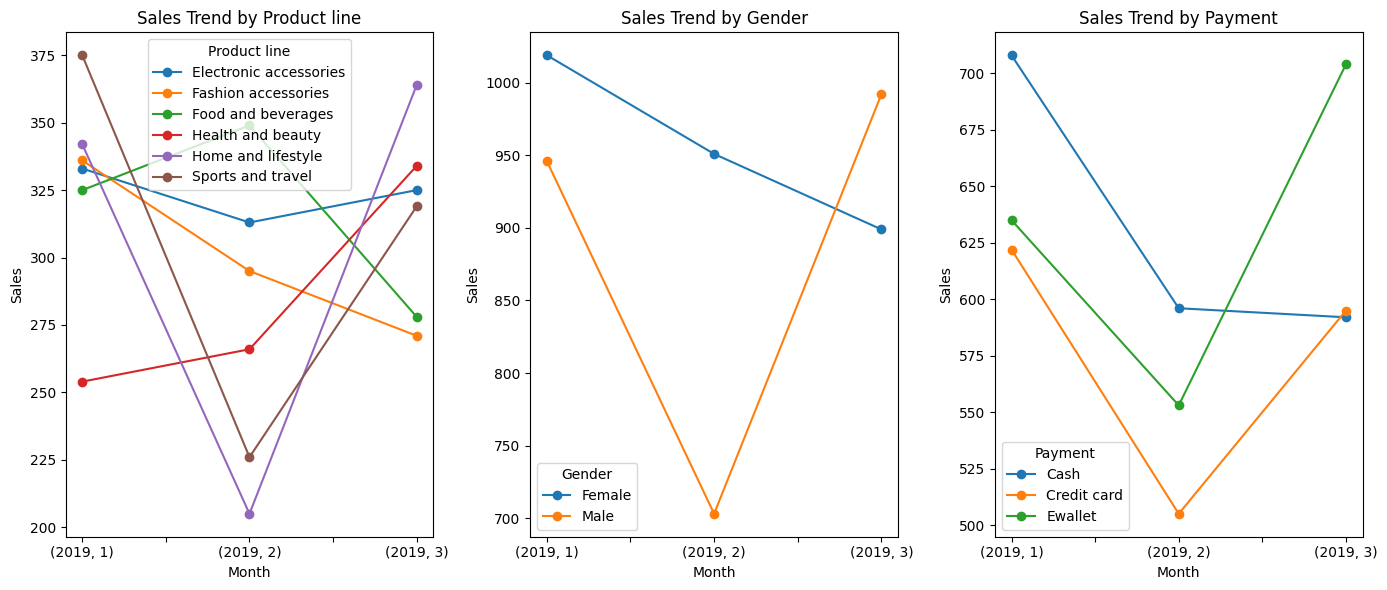

In [133]:
# Visualization
# Sales trend across product line, gender, and payment method
plt.figure(figsize=(14, 6))
for i, category in enumerate(['Product line', 'Gender', 'Payment']):
    plt.subplot(1, 3, i+1)
    category_sales = monthly_sales_revenue.groupby(['Year', 'Month', category])['Quantity'].sum().unstack().fillna(0)
    category_sales.plot(kind='line', marker='o', ax=plt.gca())
    plt.title(f'Sales Trend by {category}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.legend(title=category)

plt.tight_layout()
plt.show()




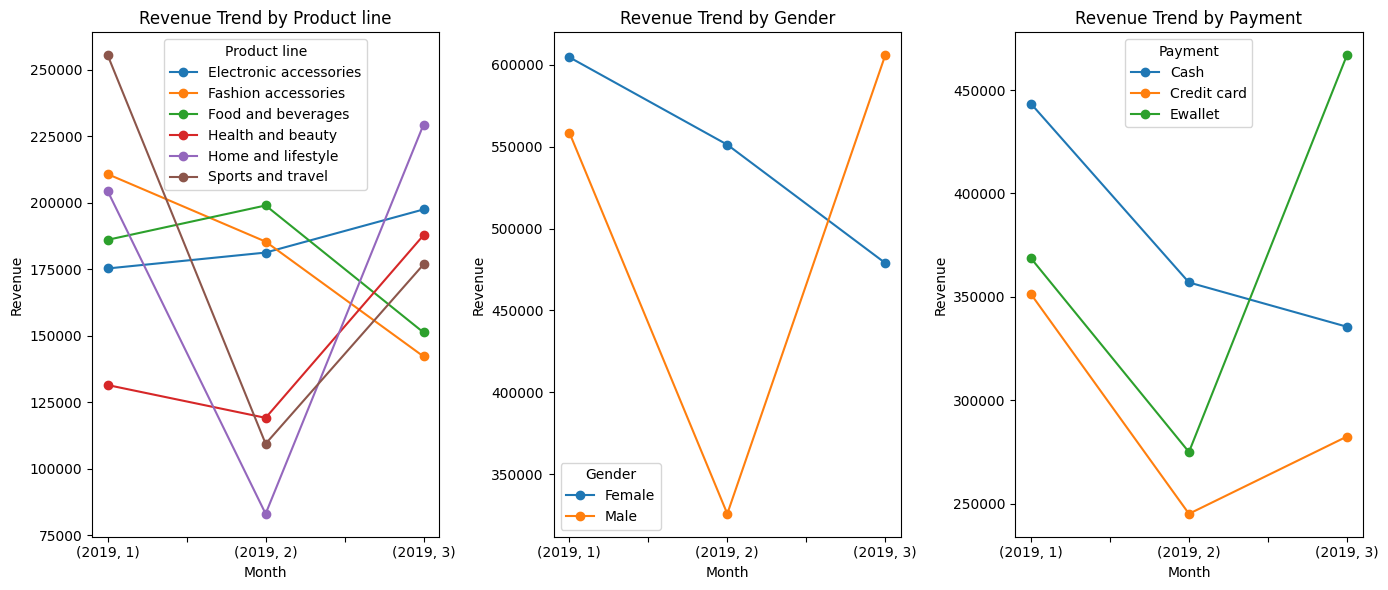

In [134]:
# Revenue trend across product line, gender, and payment method
plt.figure(figsize=(14, 6))
for i, category in enumerate(['Product line', 'Gender', 'Payment']):
    plt.subplot(1, 3, i+1)
    category_revenue = monthly_sales_revenue.groupby(['Year', 'Month', category])['Revenue'].sum().unstack().fillna(0)
    category_revenue.plot(kind='line', marker='o', ax=plt.gca())
    plt.title(f'Revenue Trend by {category}')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend(title=category)

plt.tight_layout()
plt.show()

In [135]:
#Identifying Focus Areas (April 2019)
april_2019_data = monthly_sales_revenue[(monthly_sales_revenue['Year'] == 2019) & (monthly_sales_revenue['Month'] == 4)]
focus_areas = april_2019_data.groupby(['Product line', 'Gender', 'Payment'])[['Quantity', 'Revenue']].sum()
print("Focus Areas for April 2019:")
print(focus_areas)

Focus Areas for April 2019:
Empty DataFrame
Columns: [Quantity, Revenue]
Index: []


In [136]:
#It seems that there is no data available for April 2019 in the provided dataset. Therefore, we couldn't identify any focus areas for April 2019.
#In such cases, we may want to check if there is missing data for April 2019 in the original dataset or if there is a need to acquire additional data to perform the analysis for that specific month.
#If we have access to a larger dataset that includes April 2019 data, we can replace the current dataset with the updated one and rerun the analysis to identify focus areas for that month.
#Alternatively, we can analyze other available months or periods to identify potential focus areas for improving sales and revenue.